**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

from scipy import optimize

import sympy as sm
from IPython.display import display

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

# write your code here

In [195]:
# Define the symbols
L, w, tau, alpha, nu, kappa, G, w_tilde = sm.symbols('L w tau alpha nu kappa G w_tilde')

# Define the utility function
#w_tilde = (1-tau) * w
#C = kappa + w_hat * L
V = sm.log((kappa + w_tilde * L)**alpha * G**(1 - alpha)) - nu * L**2 / 2 # use C = kappa + w_hat * L and w_tilde = (1-tau) * w

# Differentiate the utility function with respect to labor supply (L)
V_diff = sm.diff(V, L)

# Set the first-order condition (FOC) to zero and solve for L
L_star = sm.solve(V_diff, L)
L_star[0]

(-kappa*nu - sqrt(nu*(4*alpha*w_tilde**2 + kappa**2*nu)))/(2*nu*w_tilde)

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

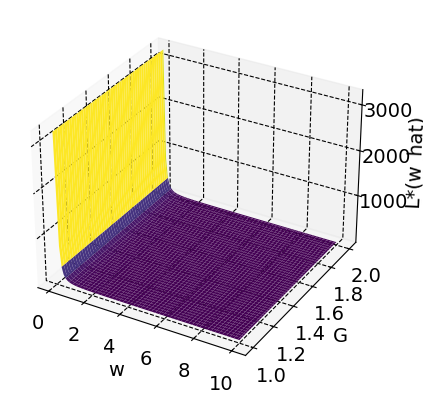

In [196]:
# Define the parameters and values
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
tau = 0.30

# Define the L*(w_hat) formula
def optimal_labor_supply(w_hat, G):
    return (-kappa + np.sqrt(kappa**2 + 4 * alpha / (nu * w_hat**2))) / (2 * w_hat)

# Define the range of w and G values
w_values = np.linspace(0.1, 10, 100)
G_values = np.linspace(1.0, 2.0, 100)

# Create a meshgrid of w and G values
W, G = np.meshgrid(w_values, G_values)

# Calculate L*(w_hat) for each w and G combination
L_star = optimal_labor_supply((1 - tau) * W, G)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(W, G, L_star, cmap='viridis')

# Set the plot labels
ax.set_xlabel('w')
ax.set_ylabel('G')
ax.set_zlabel('L*(w_hat)')

# Show the plot
plt.show()



We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [197]:
# define tau values
#tau_values = np.linspace(0, 1, 100)

# define worker utility
#def utility(w, tau, G, L)
    #tau = tau_values
   # V = np.log((kappa + (1-tau)*w*L)**alpha * G**(1-alpha)) - nu * (L ** 2) / 2
    #return V

# define G and L
#G_new = tau * w * optimal_labor_supply((1-tau)*w)
#L_new = optimal_labor_supply((1-tau)*w, G_new)
# Create a meshgrid of w and G values
#W, G = np.meshgrid(w_values, G_values)

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [198]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [199]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [200]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

We start looking at the numerical solutions:

In [201]:
#We set our variables:
eta = 0.5
w = 1.0
kappa_values = [1.0, 2.0]

#We insert our given variables into the functions:
for kappa in kappa_values:
    l_optimal = ((1 - eta) * kappa / w) ** (1 / eta)
    profits_optimal = kappa * l_optimal ** (1 - eta) - w * l_optimal
  
    print(f"For kappa = {kappa}:")
    print(f"Optimal ell_t: {l_optimal}")
    print(f"Optimal profits: {profits_optimal}\n")


For kappa = 1.0:
Optimal ell_t: 0.25
Optimal profits: 0.25

For kappa = 2.0:
Optimal ell_t: 1.0
Optimal profits: 1.0



We find that for $\kappa=2$ will the profit be highest.

Now we investigate whether this is the maximized profit:

In [246]:
# deifne the optimal labor
def optimal_labor(theta, w, kappa):
    return (((1-eta)*kappa)/w)**(1/eta)

# define profits
def profit(x, eta=0.5, w=1.0):
    l, kappa = x
    return -(kappa * l ** (1-eta) - w * l)

# set initial guess and bounds
x0 = (1., 1.5)
bounds = ((0, np.inf), (1,2))

# call solver
res = optimize.minimize(profit, x0, method='Nelder-Mead', bounds=bounds, tol=1e-8)

# save results
optimal_l = res.x[0]
optimal_kappa = res.x[1]

# print
print(rf'The optimal labor that maximizes profits is {optimal_l:.2f} for kappa = {optimal_kappa}' + '\n')

# we check if this result is equal to the analytically solution given in the assignment
print('Is the numerical and analytical solution identical?')
print(np.isclose(optimal_l, optimal_labor(0.5, 1., optimal_kappa)))

The optimal labor that maximizes profits is 1.00 for kappa = 2.0

Is the numerical and analytical solution identical?
True


We can hereby verify that $\kappa=2$

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [253]:
# Set baseline parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1/12)
T = 120  # Planning horizon

# Simulate shock series
K = 1000  # Number of simulations
np.random.seed(69)  # Set seed for reproducibility
epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Calculate h for each shock series
h_values = []
for k in range(K):
    kappa = np.zeros(T)
    kappa[0] = 1.0  # Initial shock

    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[k, t])

    ell = ((1 - eta) * kappa / w) ** (1 / eta)
    profits = kappa * ell**(1 - eta) - w * ell
    adjustment_costs = np.abs(np.diff(ell, prepend=0)) * iota
    h = np.sum(R**np.arange(T) * (profits - adjustment_costs))
    h_values.append(h)

# Calculate the expected value
H_1 = np.mean(h_values)

print(f"H1 = {H_1:.4f}")


H1 = 31.7258


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [256]:
# Set baseline parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1/12)
T = 120  # Planning horizon
delta = 0.05  # Threshold

# Simulate shock series
K = 1000  # Number of simulations
np.random.seed(69)  # Set seed for reproducibility
epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Calculate h for each shock series
h_values = []
for k in range(K):
    kappa = np.zeros(T)
    kappa[0] = 1.0  # Initial shock

    ell = np.zeros(T)
    ell[0] = 0.0  # Initial hairdresser level

    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[k, t])

        ell_optimal = ((1 - eta) * kappa[t] / w) ** (1 / eta)
        if np.abs(ell[t-1] - ell_optimal) > delta:
            ell[t] = ell_optimal
        else:
            ell[t] = ell[t-1]

    profits = kappa * ell**(1 - eta) - w * ell
    adjustment_costs = np.abs(np.diff(ell, prepend=0)) * iota
    h = np.sum(R**np.arange(T) * (profits - adjustment_costs))
    h_values.append(h)

# Calculate the expected value
H_2 = np.mean(h_values)

print(f"H2 = {H_2:.4f}")


H2 = 31.4177


We find this policy does not improve the profitability, as H_1>H_2

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

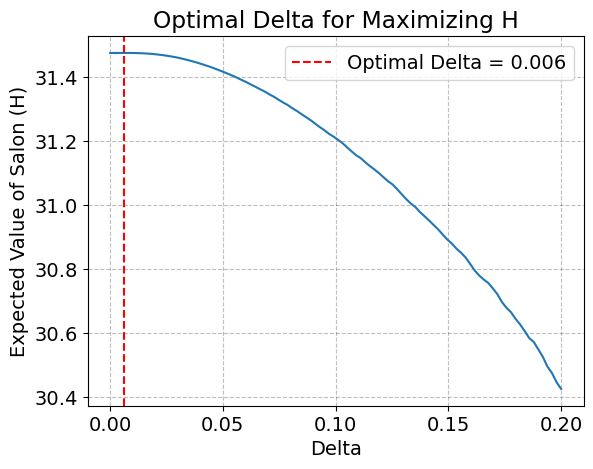

Optimal Delta: 0.006
H3: 31.4764


In [255]:
# Set baseline parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1/12)
T = 120  # Planning horizon

# Grid search parameters
delta_values = np.linspace(0, 0.2, 100)  # Range of delta values to test

# Simulate shock series
K = 1000  # Number of simulations
np.random.seed(69)  # Set seed for reproducibility
epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Calculate h for each delta value
H_values = []
for delta in delta_values:
    h_values = []
    for k in range(K):
        kappa = np.zeros(T)
        kappa[0] = 1.0  # Initial shock

        ell = np.zeros(T)
        ell[0] = 0.0  # Initial hairdresser level

        for t in range(1, T):
            kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[k, t])

            ell_optimal = ((1 - eta) * kappa[t] / w) ** (1 / eta)
            if np.abs(ell[t-1] - ell_optimal) > delta:
                ell[t] = ell_optimal
            else:
                ell[t] = ell[t-1]

        profits = kappa * ell**(1 - eta) - w * ell
        adjustment_costs = np.abs(np.diff(ell, prepend=0)) * iota
        h = np.sum(R**np.arange(T) * (profits - adjustment_costs))
        h_values.append(h)

    # Calculate the expected value
    H = np.mean(h_values)
    H_values.append(H)

# Find optimal delta
optimal_delta = delta_values[np.argmax(H_values)]
H_3 = np.max(H_values)

# Plot results
plt.plot(delta_values, H_values)
plt.xlabel('Delta')
plt.ylabel('Expected Value of Salon (H)')
plt.title('Optimal Delta for Maximizing H')
plt.axvline(x=optimal_delta, color='r', linestyle='--', label=f'Optimal Delta = {optimal_delta:.3f}')
plt.legend()
plt.show()

print(f"Optimal Delta: {optimal_delta:.3f}")
print(f"H3: {H_3:.4f}")


In [268]:
# Determine the delta with the highest profit
max_H = max(H_2, H_3, H_4)
if max_H == H_2:
    print(f"The optimal delta is {delta:.3f} as this yields H={H_2:.3f}")
else:
    print(f"The optimal delta is {optimal_delta:.3f} as this yields H={H_3:.3f}")

The optimal delta is 0.006 as this yields H=31.476



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



To improve the profitability we could adjust the employment level based on previous profits: 
* Set the employment level equal to optimal employment level $\ell_t^*$ if the previous period's profit was positive 
* Otherwise, keep the employment level unchanged.

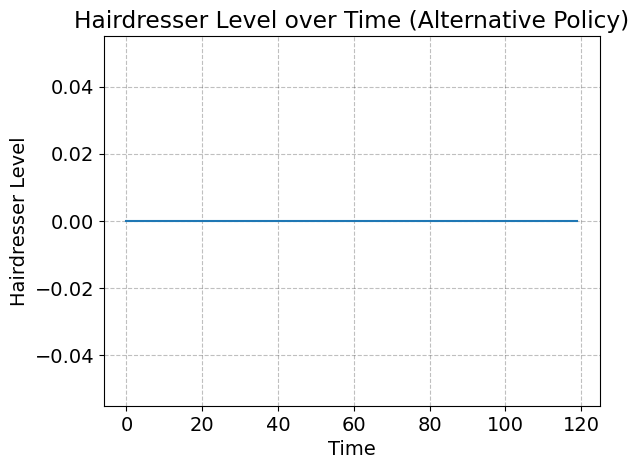

H = 0.0000


In [289]:
import numpy as np
import matplotlib.pyplot as plt

# Set baseline parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1/12)
T = 120  # Planning horizon

# Policy parameters
periods_threshold = 6  # Number of periods to consider for cumulative profitability
profitability_threshold = 0.0  # Cumulative profitability threshold for adjustment

# Simulate shock series
K = 1000  # Number of simulations
np.random.seed(0)  # Set seed for reproducibility
epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Calculate h for each policy
h_values = []
for k in range(K):
    kappa = np.zeros(T)
    kappa[0] = 1.0  # Initial shock

    ell = np.zeros(T)
    ell[0] = 0.0  # Initial hairdresser level

    cumulative_profitability = 0.0  # Initialize cumulative profitability

    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[k, t])

        ell_optimal = ((1 - eta) * kappa[t] / w) ** (1 / eta)

        if t > periods_threshold:
            cumulative_profitability -= w * ell[t-periods_threshold]  # Subtract the wage cost of the hairdresser from t-periods_threshold
        cumulative_profitability += kappa[t] * ell_optimal**(1 - eta) - w * ell_optimal

        if cumulative_profitability < profitability_threshold:
            ell[t] = ell_optimal
        else:
            ell[t] = ell[t-1]

    profits = kappa * ell**(1 - eta) - w * ell
    adjustment_costs = np.abs(np.diff(ell, prepend=0)) * iota
    h = np.sum(R**np.arange(T) * (profits - adjustment_costs))
    h_values.append(h)

# Calculate the expected value
H = np.mean(h_values)

# Plot hairdresser level over time
plt.plot(range(T), ell)
plt.xlabel('Time')
plt.ylabel('Hairdresser Level')
plt.title('Hairdresser Level over Time (Alternative Policy)')
plt.show()

print(f"H = {H:.4f}")


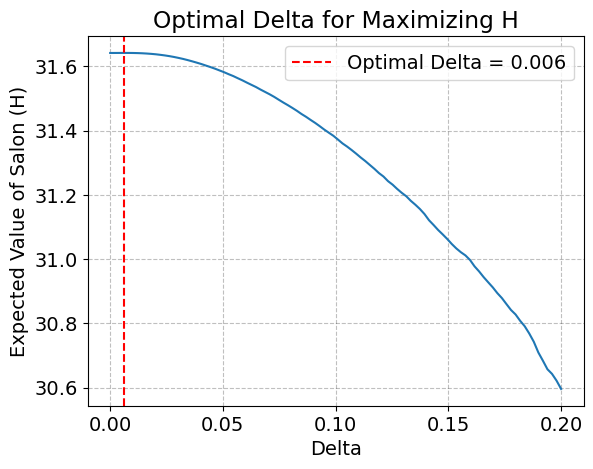

Optimal Delta: 0.006
Optimal H: 31.6420


In [288]:
import numpy as np
import matplotlib.pyplot as plt

# Set baseline parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1/12)
T = 120  # Planning horizon
delta = 0.05  # Threshold

# Simulate shock series
K = 1000  # Number of simulations
np.random.seed(0)  # Set seed for reproducibility
epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Calculate h for each delta value
H_values = []
for delta in delta_values:
    h_values = []
    for k in range(K):
        kappa = np.zeros(T)
        kappa[0] = 1.0  # Initial shock

        ell = np.zeros(T)
        ell[0] = 0.0  # Initial hairdresser level

        for t in range(1, T):
            kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[k, t])

            ell_optimal = ((1 - eta) * kappa[t] / w) ** (1 / eta)
            if np.abs(ell[t-1] - ell_optimal) > delta:
                ell[t] = ell_optimal
            elif np.abs(ell[t-2] - ell_optimal) > delta:
                ell[t] = ell[t-1]
            else:
                ell[t] = ell[t-1]

        profits = kappa * ell**(1 - eta) - w * ell
        adjustment_costs = np.abs(np.diff(ell, prepend=0)) * iota
        h = np.sum(R**np.arange(T) * (profits - adjustment_costs))
        h_values.append(h)

    # Calculate the expected value
    H = np.mean(h_values)
    H_values.append(H)

# Find optimal delta
optimal_delta = delta_values[np.argmax(H_values)]
optimal_H = np.max(H_values)

# Plot results
plt.plot(delta_values, H_values)
plt.xlabel('Delta')
plt.ylabel('Expected Value of Salon (H)')
plt.title('Optimal Delta for Maximizing H')
plt.axvline(x=optimal_delta, color='r', linestyle='--', label=f'Optimal Delta = {optimal_delta:.3f}')
plt.legend()
plt.show()

print(f"Optimal Delta: {optimal_delta:.3f}")
print(f"Optimal H: {optimal_H:.4f}")


H (Alternative Policy) = 30.7236


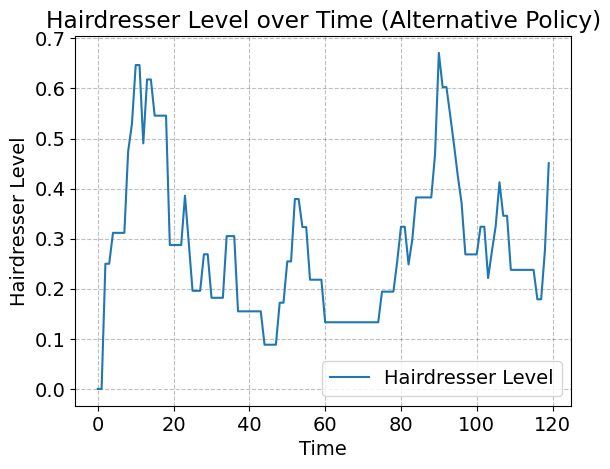

In [287]:
import numpy as np
import matplotlib.pyplot as plt

# Set baseline parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1/12)
T = 120  # Planning horizon
lag = 2  # Lagged adjustment period in months

# Simulate shock series
K = 1000  # Number of simulations
np.random.seed(0)  # Set seed for reproducibility
epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Calculate h for the alternative policy
h_values = []
for k in range(K):
    kappa = np.zeros(T)
    kappa[0] = 1.0  # Initial shock

    ell = np.zeros(T)
    ell[0] = 0.0  # Initial hairdresser level

    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[k, t])

        if t >= lag:
            ell_optimal = ((1 - eta) * kappa[t-lag] / w) ** (1 / eta)
            if np.abs(ell[t-1] - ell_optimal) > delta:
                ell[t] = ell_optimal
            else:
                ell[t] = ell[t-1]
        else:
            ell[t] = ell[t-1]

    profits = kappa * ell**(1 - eta) - w * ell
    adjustment_costs = np.abs(np.diff(ell, prepend=0)) * iota
    h = np.sum(R**np.arange(T) * (profits - adjustment_costs))
    h_values.append(h)

# Calculate the expected value
H = np.mean(h_values)

print(f"H (Alternative Policy) = {H:.4f}")

# Plot results
plt.plot(np.arange(T), ell, label='Hairdresser Level')
plt.xlabel('Time')
plt.ylabel('Hairdresser Level')
plt.title('Hairdresser Level over Time (Alternative Policy)')
plt.legend()
plt.show()


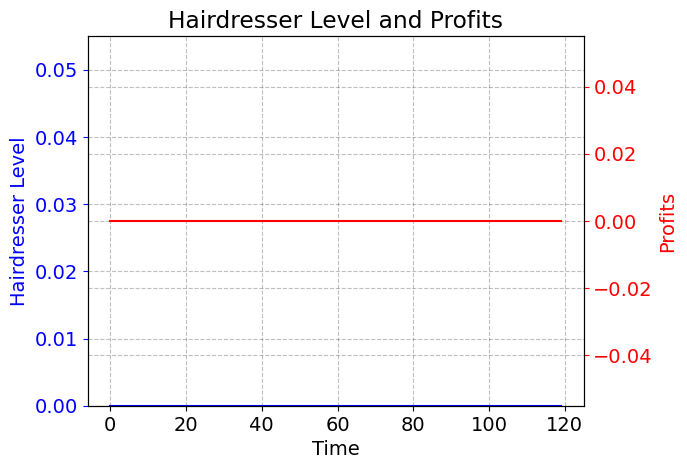

Expected Value of Salon (H): 0.0000


In [285]:
import numpy as np
import matplotlib.pyplot as plt

# Set baseline parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1/12)
T = 120  # Planning horizon
window_size = 12  # Window size for calculating average profit
increase_factor = 1.1  # Factor to increase hairdresser level
decrease_factor = 0.9  # Factor to decrease hairdresser level

# Simulate shock series
K = 1000  # Number of simulations
np.random.seed(0)  # Set seed for reproducibility
epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Calculate h for the alternative policy
h_values = []
for k in range(K):
    kappa = np.zeros(T)
    kappa[0] = 1.0  # Initial shock

    ell = np.zeros(T)
    ell[0] = 0.0  # Initial hairdresser level

    profits = np.zeros(T)
    avg_profits = np.zeros(T)
    avg_profits[:window_size] = np.mean(profits[:window_size])

    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[k, t])

        ell_optimal = ((1 - eta) * kappa[t] / w) ** (1 / eta)

        if profits[t-1] > avg_profits[t-1]:
            ell[t] = ell[t-1] * increase_factor
        elif profits[t-1] < avg_profits[t-1]:
            ell[t] = ell[t-1] * decrease_factor
        else:
            ell[t] = ell[t-1]

        profits[t] = kappa[t] * ell[t]**(1 - eta) - w * ell[t]
        avg_profits[t] = np.mean(profits[max(0, t - window_size):t+1])

    adjustment_costs = np.abs(np.diff(ell, prepend=0)) * iota
    h = np.sum(R**np.arange(T) * (profits - adjustment_costs))
    h_values.append(h)

# Calculate the expected value
H = np.mean(h_values)

# Plotting the hairdresser level and profits
time = np.arange(T)
fig, ax1 = plt.subplots()

ax1.plot(time, ell, color='b')
ax1.set_xlabel('Time')
ax1.set_ylabel('Hairdresser Level', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.plot(time, profits, color='r')
ax2.set_ylabel('Profits', color='r')
ax2.tick_params('y', colors='r')

plt.title('Hairdresser Level and Profits')
plt.show()

print(f"Expected Value of Salon (H): {H:.4f}")


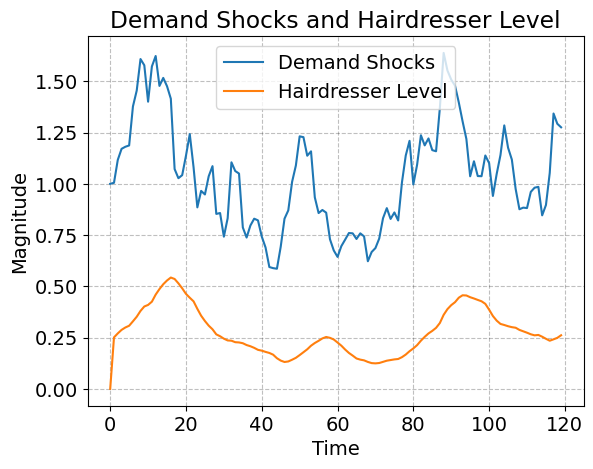

Expected Value of Salon (H): 30.9282


In [284]:
import numpy as np
import matplotlib.pyplot as plt

# Set baseline parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1/12)
T = 120  # Planning horizon
window = 12  # Rolling average window size

# Simulate shock series
K = 1000  # Number of simulations
np.random.seed(0)  # Set seed for reproducibility
epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Calculate h for each simulation
h_values = []
for k in range(K):
    kappa = np.zeros(T)
    kappa[0] = 1.0  # Initial shock

    ell = np.zeros(T)
    ell[0] = 0.0  # Initial hairdresser level

    rolling_avg = np.zeros(T)
    rolling_avg[0] = kappa[0]

    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[k, t])

        if t < window:
            rolling_avg[t] = np.mean(kappa[:t+1])
        else:
            rolling_avg[t] = np.mean(kappa[t-window+1:t+1])

        ell[t] = ((1 - eta) * rolling_avg[t] / w) ** (1 / eta)

    profits = kappa * ell**(1 - eta) - w * ell
    adjustment_costs = np.abs(np.diff(ell, prepend=0)) * iota
    h = np.sum(R**np.arange(T) * (profits - adjustment_costs))
    h_values.append(h)

# Calculate the expected value
H = np.mean(h_values)

# Plot demand shocks and hairdresser level
time = np.arange(T)
plt.plot(time, kappa, label='Demand Shocks')
plt.plot(time, ell, label='Hairdresser Level')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Demand Shocks and Hairdresser Level')
plt.legend()
plt.show()

print(f"Expected Value of Salon (H): {H:.4f}")


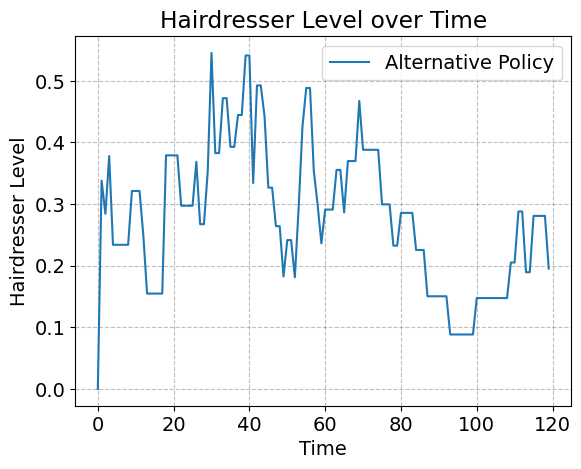

H (Alternative Policy) = 31.4177


In [283]:
import numpy as np
import matplotlib.pyplot as plt

# Set baseline parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1/12)
T = 120  # Planning horizon

# Simulate shock series
K = 1000  # Number of simulations
np.random.seed(69)  # Set seed for reproducibility
epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Calculate h for alternative policy
h_values = []
for k in range(K):
    kappa = np.zeros(T)
    kappa[0] = 1.0  # Initial shock

    ell = np.zeros(T)
    ell[0] = 0.0  # Initial hairdresser level

    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[k, t])

        ell_optimal = ((1 - eta) * kappa[t] / w) ** (1 / eta)
        ell_lagged = ell[t-1]  # Lagged adjustment
        if np.abs(ell_lagged - ell_optimal) > delta:
            ell[t] = ell_optimal
        else:
            ell[t] = ell_lagged

    profits = kappa * ell**(1 - eta) - w * ell
    adjustment_costs = np.abs(np.diff(ell, prepend=0)) * iota
    h = np.sum(R**np.arange(T) * (profits - adjustment_costs))
    h_values.append(h)

# Calculate the expected value
H = np.mean(h_values)

# Plot hairdresser level over time
plt.plot(range(T), ell, label='Alternative Policy')
plt.xlabel('Time')
plt.ylabel('Hairdresser Level')
plt.title('Hairdresser Level over Time')
plt.legend()
plt.show()

print(f"H (Alternative Policy) = {H:.4f}")


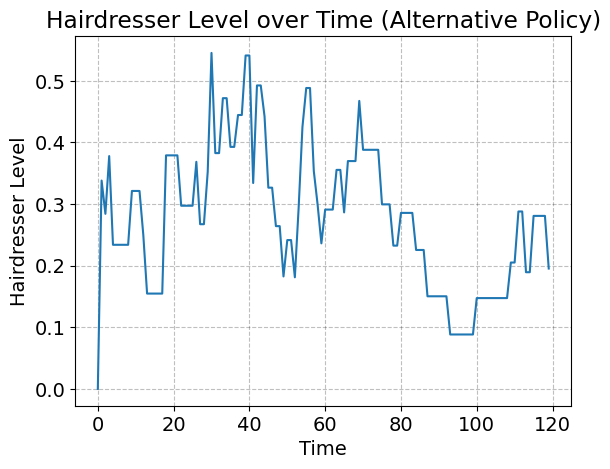

H4 = 31.4177


In [275]:
import numpy as np
import matplotlib.pyplot as plt

# Set baseline parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1/12)
T = 120  # Planning horizon
lag = 1  # Lag in adjustment

# Simulate shock series
K = 1000  # Number of simulations
np.random.seed(69)  # Set seed for reproducibility
epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Calculate h for each shock series
h_values = []
for k in range(K):
    kappa = np.zeros(T)
    kappa[0] = 1.0  # Initial shock

    ell = np.zeros(T)
    ell[0] = 0.0  # Initial hairdresser level

    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[k, t])

        if t >= lag:
            ell_optimal = ((1 - eta) * kappa[t] / w) ** (1 / eta)
            ell[t] = ell[t-lag] if np.abs(ell[t-lag] - ell_optimal) <= delta else ell_optimal
        else:
            ell_optimal = ((1 - eta) * kappa[t] / w) ** (1 / eta)
            ell[t] = ell_optimal

    profits = kappa * ell**(1 - eta) - w * ell
    adjustment_costs = np.abs(np.diff(ell, prepend=0)) * iota
    h = np.sum(R**np.arange(T) * (profits - adjustment_costs))
    h_values.append(h)

# Calculate the expected value
H_4 = np.mean(h_values)

# Plot hairdresser level
time = np.arange(T)
plt.plot(time, ell)
plt.xlabel('Time')
plt.ylabel('Hairdresser Level')
plt.title('Hairdresser Level over Time (Alternative Policy)')
plt.show()

print(f"H4 = {H_4:.4f}")


In [281]:
# Determine the policy with the highest profit
max_H = max(H_1, H_2, H_3, H_4)
if max_H == H_1:
    print("The policy from Question 2 yields the highest profit.")
elif max_H == H_2:
    print("The policy from Question 3 (Delta = 0.05) yields the highest profit.")
elif max_H == H_3:
    print("The policy from Question 4 (Optimal Delta) yields the highest profit.")
else:
    print("The policy from Question 5 (Alternative Policy) yields the highest profit.")
print(f"H1: {H_1:.3f}")
print(f"H2: {H_2:.3f}")
print(f"H3: {H_3:.3f}")
print(f"H4: {H_4:.3f}")

The policy from Question 2 yields the highest profit.
H1: 31.726
H2: 31.418
H3: 31.476
H4: 31.418


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [208]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [209]:
def refined_global_optimizer(bounds, tau, K_, K):

    # step 1: chosen bounds and tolerance
    bounds = bounds
    tau = tau
    
    # step 2: set number of warm-up and maximum number of iterations
    K_ = K_
    K = K

    x_star = None

    it = 0

    for k in range(K):
        # step 3.A: draw random uniformly within chosen bounds
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= K_:
            # step 3.C: calculate chi
            chi = 0.5 * 2 / (1 + np.exp((k - K_) / 100))
            # step 3.D: calculate effective initial guess
            x_k0 = chi * x_k + (1 - chi) * x_star
        else:
            x_k0 = x_k

        # step 3.E: call optimizer with x_k0 as initial guess and x_k_star as result
        result = optimize.minimize(griewank, x_k0, method='BFGS', tol=tau)
        x_k_star = result.x

        # step 3.F:
        if k == 0 or result.fun < griewank(x_star):
            x_star = x_k_star

        # step 3.G: check break
        if result.fun < tau:
            break

        it += 1

    return x_star


# Run the refined global optimizer
res = refined_global_optimizer(bounds=[-600, 600], tau=1e-8, K_=10, K=1000)
print(rf'Optimal solution: {res}' + '\n' + rf'interations:')


Optimal solution: [-3.31871355e-09 -9.54454855e-09]
interations:


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [210]:
# write your code here